<a href="https://colab.research.google.com/github/sanjayT1903/AIChatBotSimple/blob/main/LayoutParser_layout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LayoutParser

A Python library for Document Image Analysis (DIA)

References:

Official Notebook
https://github.com/Layout-Parser/layout-parser/blob/master/examples/Deep%20Layout%20Parsing.ipynb


Github repo
https://github.com/Layout-Parser/layout-parser

Research paper
https://arxiv.org/abs/2103.15348
https://arxiv.org/pdf/2103.15348.pdf


Dataset
https://arxiv.org/abs/2004.08686



install LayoutParser library from PyPi package. Install other dependencies.

In [2]:
%%bash
pip install -U layoutparser
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
pip install layoutparser[ocr]


  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-9syc9phz/detectron2_2a8c68ce114a44d3b8e8121d866b83d1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-9syc9phz/detectron2_2a8c68ce114a44d3b8e8121d866b83d1
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1


Import the libraries

In [3]:
import layoutparser as lp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2

Clone the source files for example data

In [4]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


Change directory to read the example data

In [5]:
# Uninstall the current Pillow version
!pip uninstall -y Pillow

# Install a compatible version of Pillow (e.g., < 10.0.0)
!pip install "Pillow<10.0.0"

Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Successfully uninstalled Pillow-9.5.0
  Using cached Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl (3.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


In [5]:
%cd /content/layout-parser/examples/data/
!ls -p

/content/layout-parser/examples/data
example-table.jpeg  layout-parser/  paper-image.jpg


Read an image from the source files to infer on it

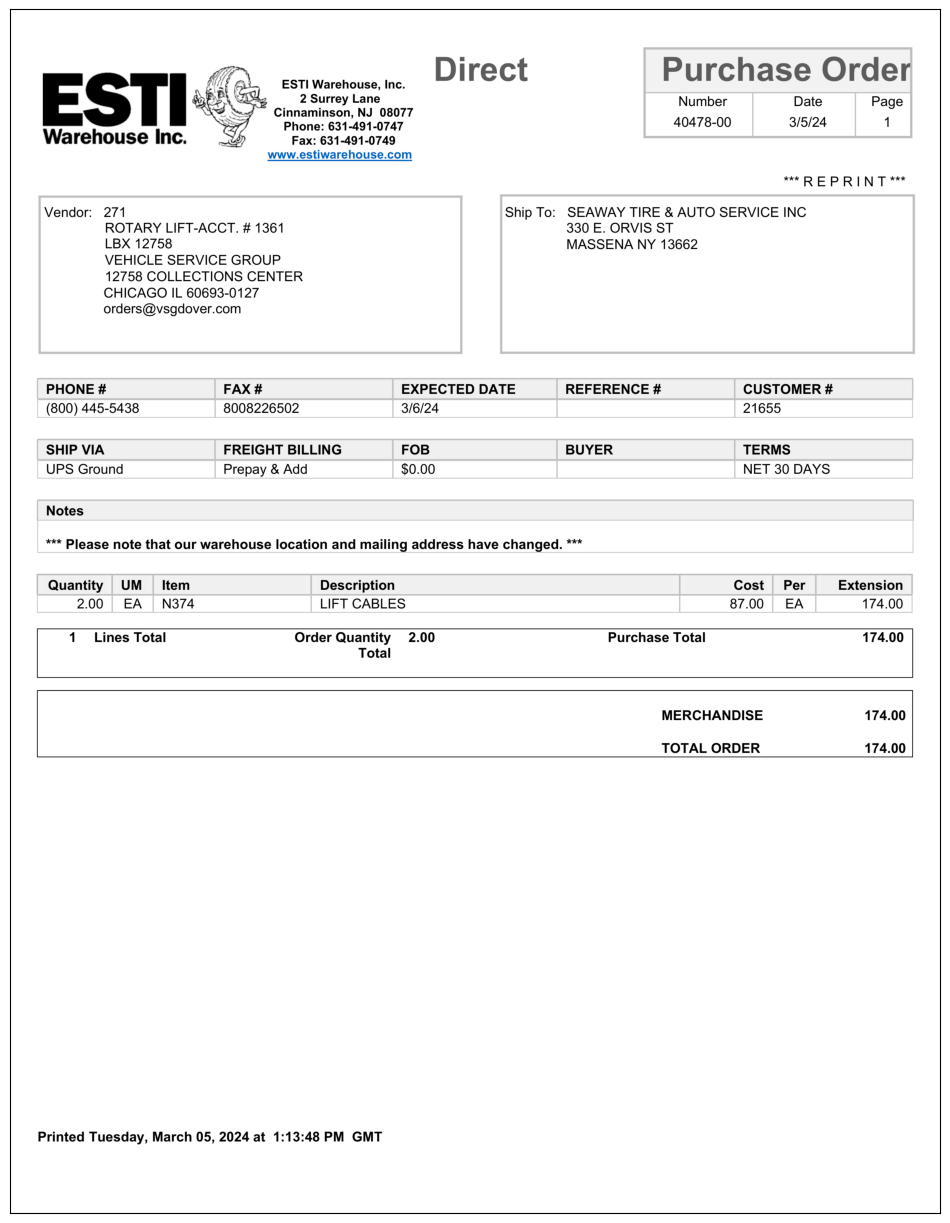

In [11]:
img = cv2.imread("/content/page_1_300dpi.png")
# convert BGR image into RGB format
image = img[..., ::-1]
# display image
plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Load a pre-trained Detectron2 model configured for Layout Parsing

In [12]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

Infer the layouts for the sample image using the pre-trained model

In [13]:
layout = model.detect(image)

Display the image with infered layouts on it

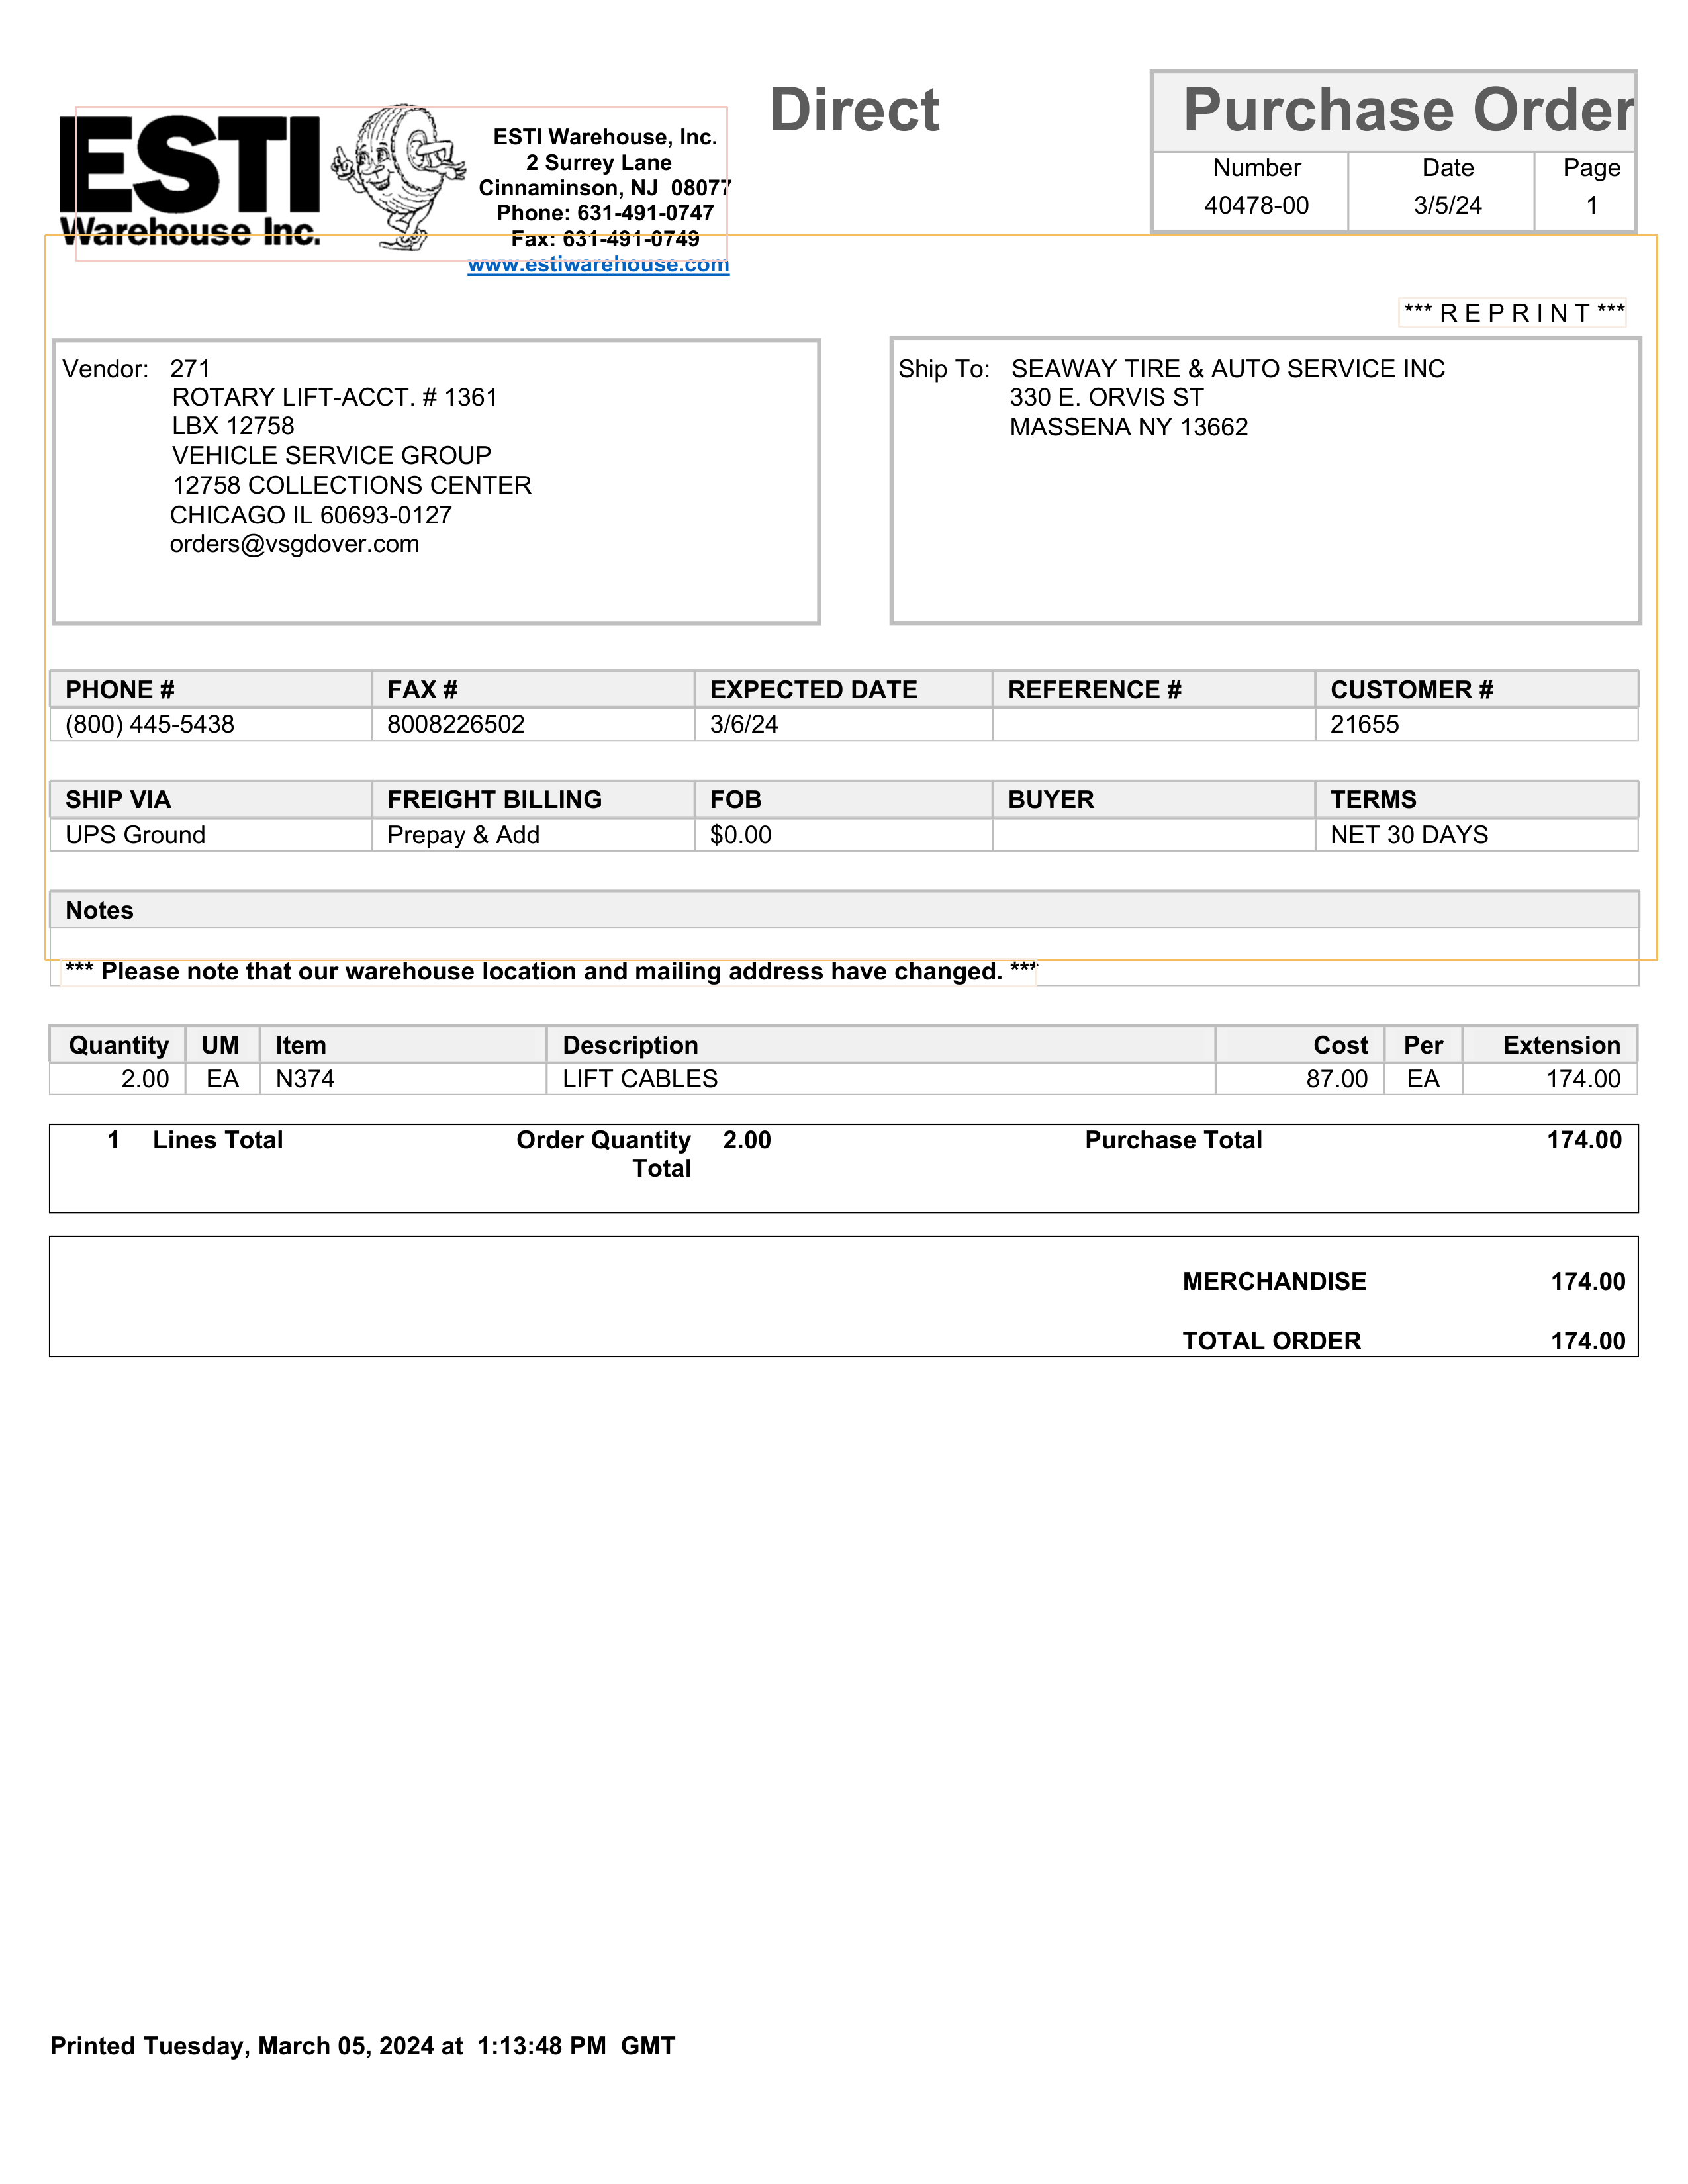

In [14]:
lp.draw_box(image, layout, box_width=3)

Thank you for your time!